In [79]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from matplotlib import cm 
from mpl_toolkits import mplot3d 
%matplotlib ipympl

We will use this info (Source: Wikipedia)

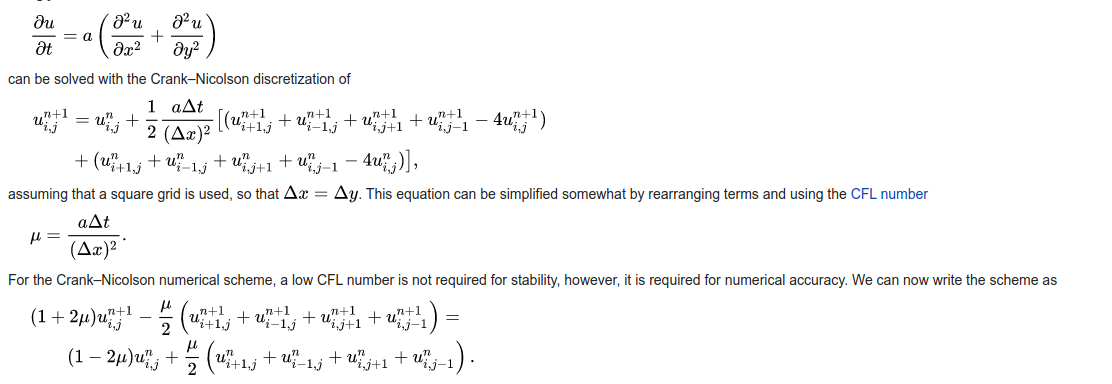

In [80]:
# No: of x and y cells
NN = 10

#Ghost cell
Ng = 2

#Total cells
Nx = Ng + NN
Ny = Ng + NN

#Min and Max of x & y
xi, yi = -1, -1
xf, yf = 1, 1

#x and y ranges
x  = np.linspace(xi,xf, Nx)
y  = np.linspace(yi,yf, Ny)

#Delta x and Delta y
dx = (xf-xi)/Nx
dy = (yf-yi)/Ny

#Delta time
dt = 0.01 * (dx+dy)/2
#Max time over which we've to simulate 
tmax =  0.25


#Diffusion/Temperarure matrix
T = np.zeros((Nx, Ny))


#Initial conditions
pos = int(NN/2)

T[pos,pos] = 1/(4*dx**2)
T[pos,pos+1] = 1/(4*dx**2)

T[pos+1,pos+1] = 1/(4*dx**2)
T[pos+1,pos] = 1/(4*dx**2)



We will impliment the this algoritim for creating matrix and to solve the system of equations. 

The following example is for i,j = 0 to i,j = 3. Based on this, general A and B matrices are created.


Here, b contains all the boundary condition values, which are 0, so i just ignored it

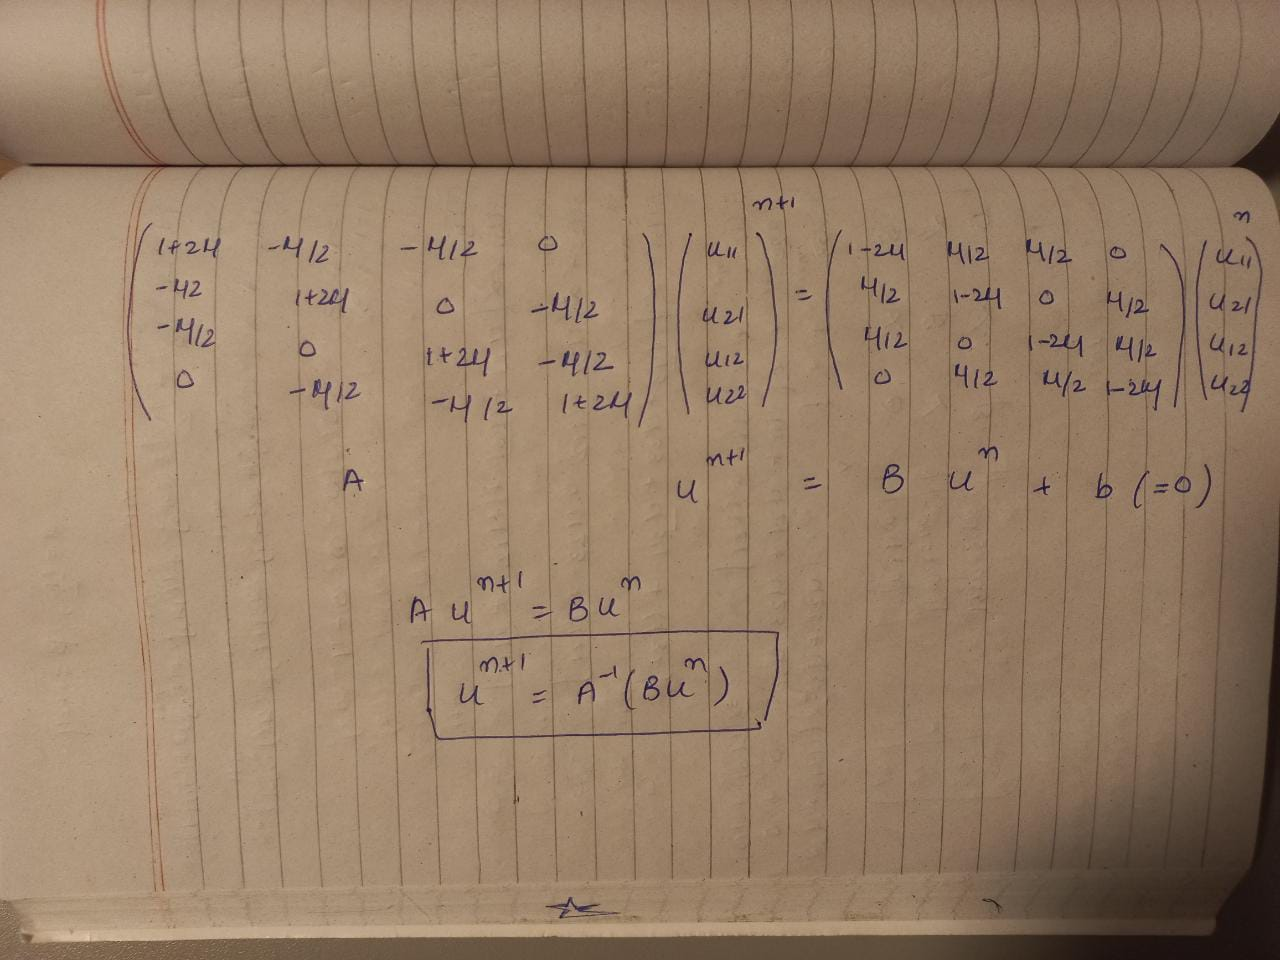



In [81]:
#Creating the cofficient matrices A and B


#For Matrix element
mun = dt/(dx**2)

#For size of matrix
N = Nx-1 
N2=(N-1)*(N-1)


#===============For matrix A =============================================
A=np.zeros((N2,N2))

## Diagonal            
for i in range (0,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j]= (1 + 2*mun)

# Lower Diagonal        
for i in range (1,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j-1]= -mun/2

# Upper Diagonal        
for i in range (0,N-2):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j+1]= -mun/2


#Lower identity matrix 
for i in range (0,N-1):
    for j in range (1,N-1):           
        A[i+(N-1)*j,i+(N-1)*(j-1)]=-mun/2      
        
#Upper identity matrix 
for i in range (0,N-1):
    for j in range (0,N-2):           
        A[i+(N-1)*j,i+(N-1)*(j+1)]=-mun/2
        
        

        
#===================For Matrix B ======================================
B=np.zeros((N2,N2))
## Diagonal            
for i in range (0,N-1):
    for j in range (0,N-1):           
        B[i+(N-1)*j,i+(N-1)*j]= 1-2*mun

#Lower Diagobal
for i in range (1,N-1):
    for j in range (0,N-1):           
        B[i+(N-1)*j,i+(N-1)*j-1]= mun/2

        
# Upper Diagonal        
for i in range (0,N-2):
    for j in range (0,N-1):           
        B[i+(N-1)*j,i+(N-1)*j+1]= mun/2  

#Lower Identity matrix
for i in range (0,N-1):
    for j in range (1,N-1):           
        B[i+(N-1)*j,i+(N-1)*(j-1)]= mun/2     
        
        
#Upper Identity matrix
for i in range (0,N-1):
    for j in range (0,N-2):           
        B[i+(N-1)*j,i+(N-1)*(j+1)]= mun/2
        



In [82]:
#inverse of Matrix A
Ainv = np.linalg.inv(A)

#initial time
time = 0

while time < tmax: 
    
    #Need to solve this 
    #T[n+1] = Ainv * ( B * T[n])
    
    
    #Step1: Transposition the original T (diffusion/temperature) Matrix
    trans = T[1:-1,1:-1].transpose()
    
    #Step2: Reshaping the matrix
    one =  trans.reshape(len(trans)*len(trans), 1)
    
    #Step3: Taking dot product of B and T[n]
    dot =  np.dot(B, one)
    
    #Step4: Now taing dot product with Ainv and computed B.T[n]
    C = np.dot (Ainv, dot)
    
    #Step5: Now, reshapping back to original shape
    T[1:-1,1:-1] = C.reshape((N-1,N-1))
    
    
    time+=dt




Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
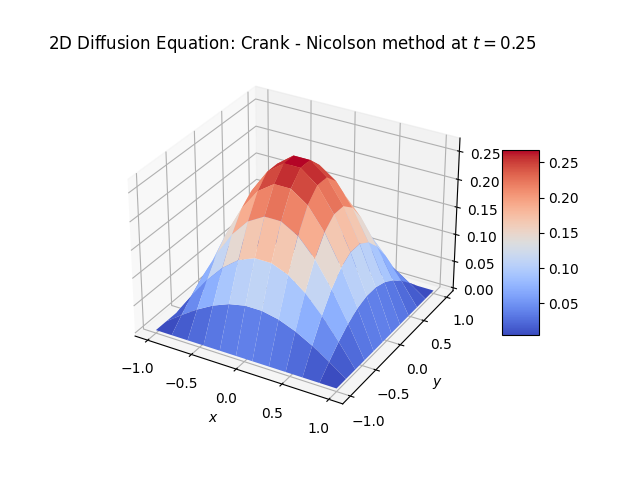

In [83]:
#Mashing x and y axes

X, Y =np.meshgrid(x, y) 

#Plotting the result
fig = plt.figure() 
ax = plt.axes(projection = '3d') 
ax.set_title("2D Diffusion Equation: Crank - Nicolson method at $t = $" + str(round(time,2) ) )
surface = ax.plot_surface(X,Y, T, cmap =cm.coolwarm)
fig.colorbar(surface, shrink=0.5, aspect=5)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$T$")
plt.show()
